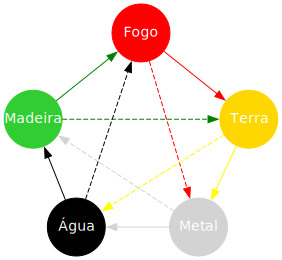

In [107]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
from graphviz import Digraph

g = Digraph('G', engine="neato", filename='teste.gv')
#g.attr(size='7',style="dashed")
nomes = ['madeira','fogo','terra','metal','água']
labels = ['Madeira','Fogo','Terra','Metal','Água']
cores = ['limegreen','red','gold','lightgray','black']
posicoes = ["0,0!","1.5,1.2!","3,0!","2.3,-1.5!","0.6,-1.5!"]
g.node_attr.update(fixedsize="True",shape='circle', style = "filled", fontname="verdana", fontcolor="white", width="0.8")
for nome, label, cor, pos in zip(nomes,labels,cores,posicoes):
    g.node(nome, label, color=cor, pos=pos)

#Ciclo de geração
g.edge('madeira','fogo', color="green")
g.edge('fogo','terra', color="red")
g.edge('terra','metal',color="yellow")
g.edge('metal','água', color="lightgrey")
g.edge('água','madeira', color="black")
#Ciclo de controle
g.edge('madeira','terra', color="green", style="dashed")
g.edge('fogo','metal', color="red", style="dashed")
g.edge('terra','água',color="yellow", style="dashed")
g.edge('metal','madeira', color="lightgrey", style="dashed")
g.edge('água','fogo', color="black", style="dashed")

g


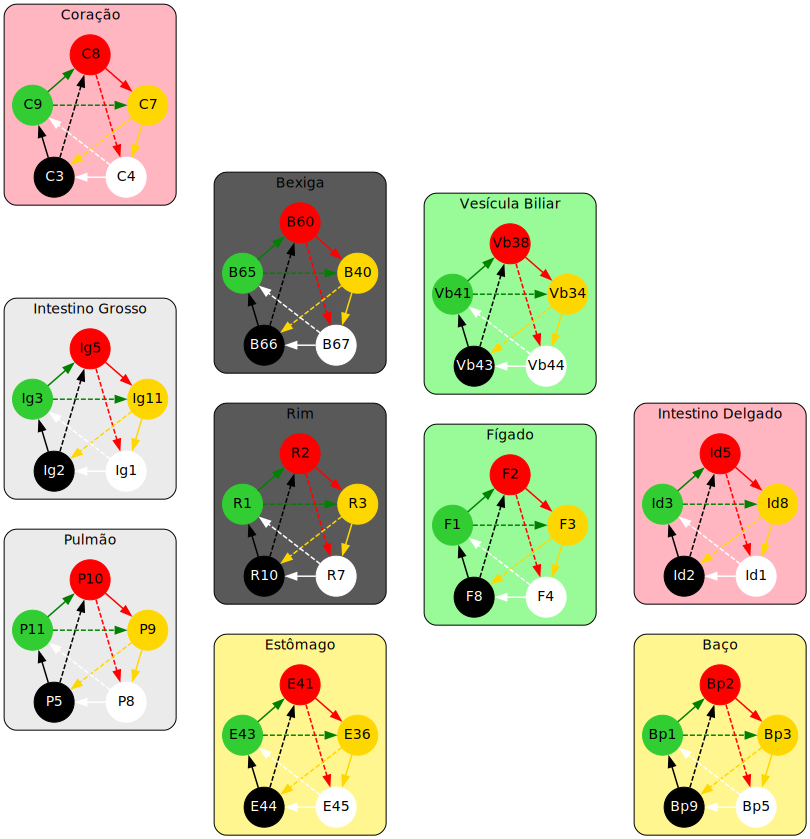

In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
from graphviz import Digraph
from IPython import display

g = Digraph('ShuYin', engine="fdp")

fundo_madeira = "palegreen"
fundo_fogo = "lightpink"
fundo_terra = "khaki1"
fundo_metal = "grey92"
fundo_água = "gray35"

# NOTE: the subgraph name needs to begin with 'cluster' (ALL LOWERCASE)
#       so that Graphviz recognizes it as a special cluster subgraph
def criar_wushu_card(zangfu,pontos, cor_fundo):
    zangfu = zangfu.decode('utf-8')
    with g.subgraph(name='cluster-'+zangfu) as r:
        r.attr(style='rounded', bgcolor=cor_fundo, fontname="verdana")
        r.node_attr.update(shape='circle', style = "filled", fontname="verdana", fixedsize="True",width="0.55")
        nomes = ['madeira-'+zangfu,'fogo-'+zangfu,'terra-'+zangfu,'metal-'+zangfu,'água-'+zangfu]
        labels = pontos
        cores = ['limegreen','red','gold','white','black']
        posicoes = ["0.2,0!","1,0.7!","1.8,0!","1.5,-1!","0.5,-1!"]

        for nome, label, cor, pos in zip(nomes,labels,cores,posicoes):
            if(nome.startswith("água")):
                cor_fonte = "white"
            else:
                cor_fonte = "black"
            r.node(nome, label, color=cor, pos=pos, fontcolor=cor_fonte)
        r.attr(label=zangfu)
        r.edge_attr.update(penwidth="1.5")
        #Ciclo de geração
        r.edge('madeira-'+zangfu,'fogo-'+zangfu, color="green")
        r.edge('fogo-'+zangfu,'terra-'+zangfu, color="red")
        r.edge('terra-'+zangfu,'metal-'+zangfu,color="gold")
        r.edge('metal-'+zangfu,'água-'+zangfu, color="white")
        r.edge('água-'+zangfu,'madeira-'+zangfu, color="black")
        #Ciclo de controle
        r.edge('madeira-'+zangfu,'terra-'+zangfu, color="green", style="dashed")
        r.edge('fogo-'+zangfu,'metal-'+zangfu, color="red", style="dashed")
        r.edge('terra-'+zangfu,'água-'+zangfu,color="gold", style="dashed")
        r.edge('metal-'+zangfu,'madeira-'+zangfu, color="white", style="dashed")
        r.edge('água-'+zangfu,'fogo-'+zangfu, color="black", style="dashed")

# Merdidianos Yin
criar_wushu_card("Rim".encode('utf-8'),['R1','R2','R3','R7','R10'],fundo_água)
criar_wushu_card("Pulmão".encode('utf-8'),['P11','P10','P9','P8','P5'],fundo_metal)
criar_wushu_card("Baço".encode('utf-8'),['Bp1','Bp2','Bp3','Bp5','Bp9'],fundo_terra)
criar_wushu_card("Coração".encode('utf-8'),['C9','C8','C7','C4','C3'],fundo_fogo)
criar_wushu_card("Fígado".encode('utf-8'),['F1','F2','F3','F4','F8'],fundo_madeira)
#Meridianos Yang
criar_wushu_card("Bexiga".encode('utf-8'),['B65','B60','B40','B67','B66'],fundo_água)
criar_wushu_card("Intestino Grosso".encode('utf-8'),['Ig3','Ig5','Ig11','Ig1','Ig2'],fundo_metal)
criar_wushu_card("Estômago".encode('utf-8'),['E43','E41','E36','E45','E44'],fundo_terra)
criar_wushu_card("Intestino Delgado".encode('utf-8'),['Id3','Id5','Id8','Id1','Id2'],fundo_fogo)
criar_wushu_card("Vesícula Biliar".encode('utf-8'),['Vb41','Vb38','Vb34','Vb44','Vb43'],fundo_madeira)

display.display(g)


In [15]:
#https://graphviz.org/docs/attr-types/style/
from graphviz import Digraph
import os
os.environ["PYTHONIOENCODING"] = "utf8" 

h = Digraph("Shu Antigos")
h.attr(rankdir="LR",fontname="verdana")
h.node_attr.update(fontname="verdana")

with h.subgraph(name='cluster_wu') as c:
    c.attr(label='5 Shu antigos 五輸穴', style='rounded,filled', color='blanchedalmond')
    c.node_attr.update(style='filled', color='white')
    c.node('a1',"Poço\n井穴", color='white')
    c.node('a2',"Manancial\n滎穴", color='lightgray')
    c.node('a3',"Riacho\n輸穴", color='darkgray')
    c.node('a4',"Rio\n經穴", color='gray40')
    c.node('a5',"Mar\n合穴", color='gray20', fontcolor='white')
    c.edges([('a1', 'a2'), ('a2', 'a3'), ('a3', 'a4'), ('a4', 'a5')])

with h.subgraph(name='cluster_yang') as c:
    c.attr(label='5 elementos nos órgãos Yang / Fu', style='rounded', )
    c.node_attr.update(style='rounded,filled', color='black')
    c.node('b1',"Metal", fillcolor='snow3')
    c.node('b2',"Água", fillcolor='black', fontcolor='white')
    c.node('b3',"Madeira", fillcolor='lightgreen')
    c.node('b4',"Fogo", fillcolor='red')
    c.node('b5',"Terra", fillcolor='yellow')
    c.edges([('b1', 'b2'), ('b2', 'b3'), ('b3', 'b4'), ('b4', 'b5')])

with h.subgraph(name='cluster_yin') as c:
    c.attr(label='5 elementos nos órgãos Yin / Zang', style='rounded', bgcolor='gray30', fontcolor='white')
    c.node_attr.update(style='rounded,filled', color='white')
    c.node('c4',"Metal", fillcolor='snow3')
    c.node('c5',"Água", fillcolor='black', fontcolor='white')
    c.node('c1',"Madeira", fillcolor='lightgreen')
    c.node('c2',"Fogo", fillcolor='red')
    c.node('c3',"Terra", fillcolor='yellow')
    c.edge_attr.update(color='white')
    c.edges([('c1', 'c2'), ('c2', 'c3'), ('c3', 'c4'), ('c4', 'c5')])

h.node('ting',"Ponta\ndos dedos", shape="Mdiamond")
h.node('he',style="rounded,filled", shape="record", label="{Cotovelo|Joelho}")

h.edges([('ting','a1'), ('ting','b1'), ('ting','c1')])
h.edges([('a5','he'), ('b5','he'), ('c5','he')])

h

AttributeError: 'str' object has no attribute 'decode'

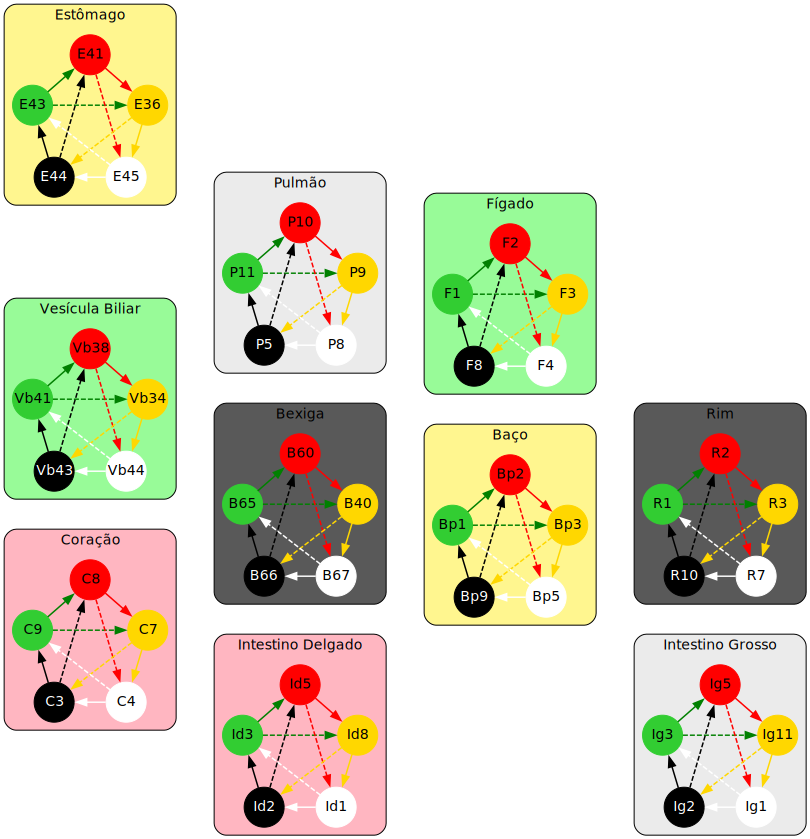

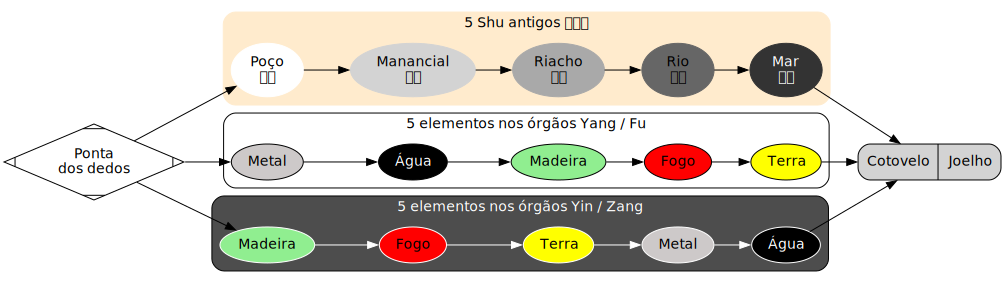

In [122]:
display.display(g)
print()
display.display(h)
print()

In [13]:
poco = 'Poço\n井穴'.encode('utf-8')
poco = poco.decode('utf-8')
poco

'Poço\n井穴'